In [108]:
import os
import time
import re
import bisect
from collections import OrderedDict
import numpy as np
import tensorflow as tf
import scipy.ndimage
import scipy.misc

import config
import misc
import tfutil
import train
import dataset

In [105]:
def generate_fake_image(labels ,run_id = 60, snapshot=6067, image_shrink=1, png_prefix=None, random_seed=1000, minibatch_size=8):
    network_pkl = misc.locate_network_pkl(run_id, snapshot)
    if png_prefix is None:
        png_prefix = misc.get_id_string_for_network_pkl(network_pkl) + '-'
    random_state = np.random.RandomState(random_seed)

    print('Loading network from "%s"...' % network_pkl)
    G, D, Gs = misc.load_network_pkl(network_pkl, snapshot)

    print('Generating image')
    latents = misc.random_latents(1, Gs, random_state=random_state)         
    image = Gs.run(latents, labels, minibatch_size=minibatch_size, num_gpus=config.num_gpus, out_mul=127.5, out_add=127.5, out_shrink=image_shrink, out_dtype=np.uint8)
    image = misc.convert_to_pil_image(misc.create_image_grid(image, grid_size=[1,1]),[0,255])
    return np.asarray(image)

Initializing TensorFlow...
Loading network from "results/060-pgan-celeba-cond-preset-v2-1gpu-fp32-GRAPH/network-snapshot-006067.pkl"...
Generating image


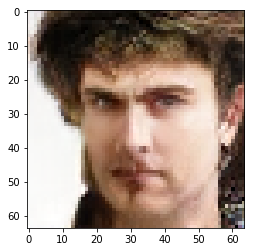

In [110]:
from matplotlib.pyplot import imshow

labels = np.zeros([1, 17], np.float32)
labels[:,0] = 0 #5_oclock_shadow
labels[:,1] = 0 #wavy_hair
labels[:,2] = 0 #Bald
labels[:,3] = 0 #Bangs
labels[:,4] = 0 #black_hair
labels[:,5] = 0 #blond hair
labels[:,6] = 1 #brown_hair
labels[:,7] = 0 #Eyeglasses
labels[:,8] = 0 #goatee
labels[:,9] = 0 #gray_hair
labels[:,10] = 1 #male
labels[:,11] = 0 #mustache
labels[:,12] = 1 #no_beard
labels[:,13] = 1 #side_burns
labels[:,14] = 0 #straigth_hair
labels[:,15] = 0 #hat
labels[:,16] = 1 #young

np.random.seed(config.random_seed)
print('Initializing TensorFlow...')
os.environ.update(config.env)
tfutil.init_tf(config.tf_config)
image = generate_fake_image(labels, random_seed=None)
imshow(image)